# Datacamp Project: Anime TV-Shows Dataset 2023
__Fiona Hak<sup>1</sup>, Elora Vigo<sup>1</sup>, Céline Guo<sup>1</sup>, Shun Robert<sup>1</sup> et  Julien Giovanazzi<sup>2</sup>__
<br>
<sup>1. M2 AMI2B<br>2. M2 Agro</sup>

## Table of contents
* [Introduction](#introduction)
* [Requirements](#requirements)
* [The dataset](#dataset)
* [Data exploration](#exploration)
* [Base model](#base_model)
* [Submitting on RAMP](#submitting)

### Introduction <a class="anchor" id="introduction"></a>
The provided dataset comprises details about various anime series, encompassing information such as titles, episode counts release date ranges, member counts, and user scores. It represents a curated compilation of popular anime series as of its creation, totaling 4700 entries. The columns include Name (the anime title), Episodes (total number of episodes), Release (date range of release), Members (number of MyAnimeList users who added the anime), and Score (user-assigned score). These data were scraped from MyAnimeList, a renowned anime and manga database, for which credit is duly acknowledged. 

The issue raised was whether we'd be able to predict anime scores based on various quantitative variables, such as the number of episodes or the number of times they've been selected by users.

### Requirements <a class="anchor" id="requirements"></a>

In [203]:
import subprocess
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

### The dataset <a class="anchor" id="dataset"></a>

The dataset is structured in the form of a table with five columns. Each row represents an anime series along with its characteristics. The first column, "Name," contains the title of the anime. The second column, "Episodes," indicates the total number of episodes in the series. The third column, "Release," presents the release date range of the anime. The fourth column, "Members," provides the number of MyAnimeList users who have added the anime to their list. Finally, the fifth column, "Score," displays the user-assigned score for the anime. Each row in the dataset represents a distinct entry for a specific anime series, along with its associated details.

The data was uploaded [here](https://www.kaggle.com/datasets/forgetabhi/anime-tv-shows-dataset-2023/data) after creating an account. The original file is available in the data/original_data/ folder.

The train and test data were randomly split into 80/20% proportions with the command :

In [204]:
subprocess.run('head -n 1 data/original_data/anime_data.csv > data/train.csv && head -n 1 data/original_data/anime_data.csv > data/test.csv && shuf data/original_data/anime_data.csv | split -d -l $(($(wc -l < data/original_data/anime_data.csv)*80/100)) - && cat x00 >> data/train.csv && cat x01 >> data/test.csv && rm x00 x01', shell=True)

CompletedProcess(args='head -n 1 data/original_data/anime_data.csv > data/train.csv && head -n 1 data/original_data/anime_data.csv > data/test.csv && shuf data/original_data/anime_data.csv | split -d -l $(($(wc -l < data/original_data/anime_data.csv)*80/100)) - && cat x00 >> data/train.csv && cat x01 >> data/test.csv && rm x00 x01', returncode=0)

### Data exploration <a class="anchor" id="exploration"></a>
First, let's visualize the data.

In [205]:
data_df = pd.read_csv('data/original_data/anime_data.csv')

In [206]:
train_df = pd.read_csv('data/train.csv')
train_df

,Unnamed: 0,Name,Episodes,Release,Members,Score
0,3483,Battle Spirits: Shounen Toppa Bashin,50.0,Sep 2008 - Sep 2009,3707,6.34
1,1281,Mahou no Tenshi Creamy Mami,52.0,Jul 1983 - Jun 1984,14801,7.34
2,1814,Denpa Onna to Seishun Otoko,12.0,Apr 2011 - Jul 2011,303839,7.12
3,4080,Heybot!,50.0,Sep 2016 - Sep 2017,2384,5.95
4,4239,Turning Mecard W Season 2,26.0,Mar 2017 - Aug 2017,524,5.81
...,...,...,...,...,...,...
3755,1062,"Kumo desu ga, Nani ka?",24.0,Jan 2021 - Jul 2021,426467,7.45
3756,2130,Project ARMS: The 2nd Chapter,26.0,Oct 2001 - Mar 2002,6142,6.98
3757,4459,Hei Mao Jing Zhang,5.0,Jan 1984 - Dec 1984,760,5.52
3758,4306,Yu☆Gi☆Oh! Go Rush!!,NaN,Apr 2022 -,5594,5.74


In [207]:
test_df = pd.read_csv('data/test.csv')
test_df

,Unnamed: 0,Name,Episodes,Release,Members,Score
0,3090.0,Onipan!,60,Apr 2022 - Jul 2022,14689,6.53
1,652.0,The iDOLM@STER Cinderella Girls: U149,12,Apr 2023 - Jun 2023,14069,7.71
2,270.0,Kaiba,12,Apr 2008 - Jul 2008,150474,8.14
3,1275.0,Un-Go,11,Oct 2011 - Dec 2011,151156,7.34
4,575.0,Princess Connect! Re:Dive Season 2,12,Jan 2022 - Mar 2022,124055,7.78
...,...,...,...,...,...,...
936,1514.0,Subete ga F ni Naru,11,Oct 2015 - Dec 2015,169701,7.24
937,742.0,Genshiken,12,Oct 2004 - Dec 2004,178013,7.63
938,4347.0,Babel Nisei (2001),13,Oct 2001 - Dec 2001,3799,5.68
939,1828.0,Onmyou Taisenki,52,Nov 2004 - Sep 2005,6253,7.12


Here are some summaries of the nature and distribution of the data:

In [208]:
print(train_df.info()) ; print(test_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3760 entries, 0 to 3759
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  3760 non-null   int64  
 1   Name        3760 non-null   object 
 2   Episodes    3735 non-null   float64
 3   Release     3760 non-null   object 
 4   Members     3760 non-null   int64  
 5   Score       3754 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 176.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  940 non-null    float64
 1   Name        941 non-null    object 
 2   Episodes    933 non-null    object 
 3   Release     941 non-null    object 
 4   Members     941 non-null    object 
 5   Score       939 non-null    object 
dtypes: float64(1), object(5)
memory usage: 44.2+ KB
None


We can see that there are 3760 rows in the train dataframe and 941 in test. There are non-zero values in the important episodes and score columns in both cases. The unnamed column corresponds to the ranking count of the various animes in the original file and is of no interest to us here. Some columns of interest, including episodes, members and score, are of object type and will have to be converted back to float and int for analysis purposes, and missing data indexed as NaN.

In [209]:
#convert to numeric
num_scores = pd.to_numeric(train_df['Score'], errors='coerce')
num_episodes = pd.to_numeric(train_df['Episodes'], errors='coerce')
num_members = pd.to_numeric(train_df['Members'], errors='coerce')

#replace nan
train_df.replace('', pd.NA, inplace=True)

The target variable is in the column Score since we classify the animes' popularity.

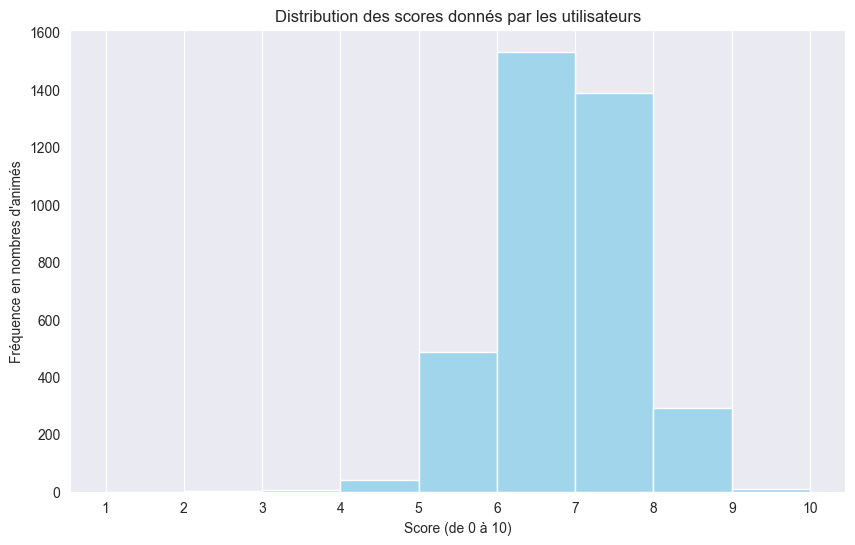

In [210]:
plt.figure(figsize=(10, 6))
sns.histplot(num_scores.dropna(), bins=range(1, 11), kde=False, color='skyblue')
plt.title('Distribution des scores donnés par les utilisateurs') ; plt.xlabel('Score (de 0 à 10)') ; plt.ylabel('Fréquence en nombres d\'animés')
plt.xticks(range(1, 11))
plt.grid(axis='y')
plt.show()

The distribution of scores is fairly unbalanced, peaking at around 7.

Finally, we have plotted the relationships between the main variables and the score:

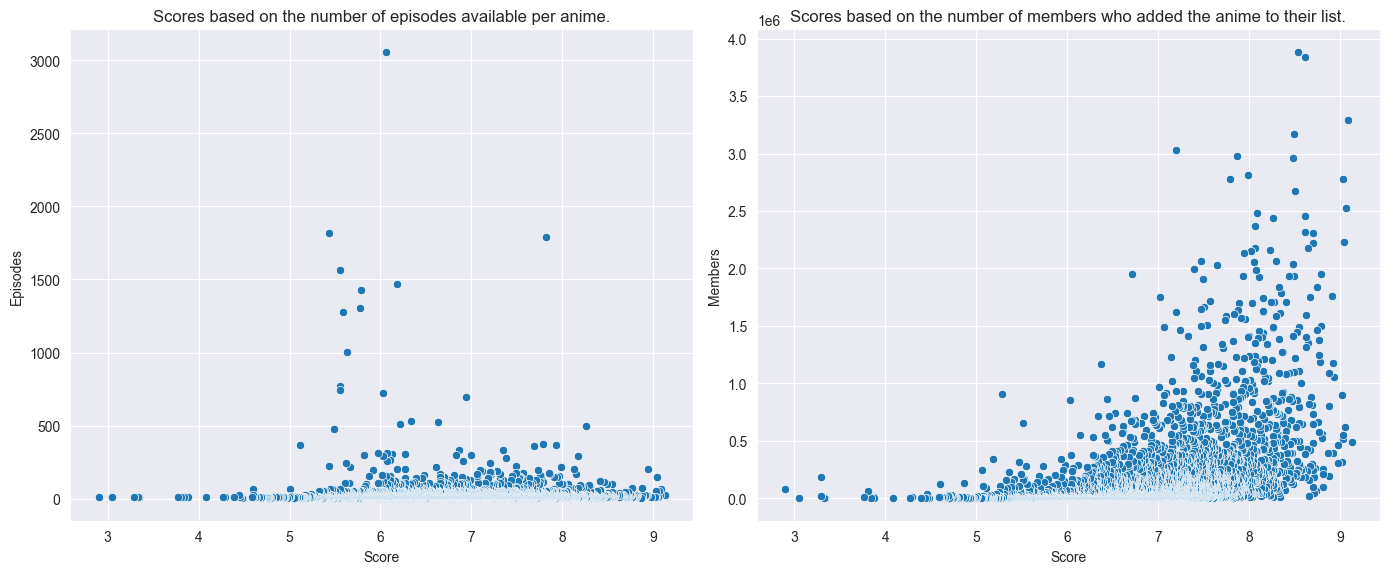

In [211]:
#display fig on same line
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

#for episodes
sns.scatterplot(x='Score', y='Episodes', data=data_df, ax=axes[0])
axes[0].set_title('Scores based on the number of episodes available per anime.')
axes[0].set_xlabel('Score')
axes[0].set_ylabel('Episodes')

#for members
sns.scatterplot(x='Score', y='Members', data=data_df, ax=axes[1])
axes[1].set_title('Scores based on the number of members who added the anime to their list.')
axes[1].set_xlabel('Score')
axes[1].set_ylabel('Members')

#display all
plt.tight_layout()
plt.show()

We can see that the more members have added the anime to their lists, the higher its score. On the other hand, the number of episodes seems to explain the score less.

### Base model <a class="anchor" id="base_model"></a>

<b>1. problem.py</b><br>

We decide to consider that we have 10 classes to classify the data. We round down the scores to make it easier to classify the anime using their scores. The result is a data set with unbalanced classes (with more observations around 7) as it can be seen on the histogram above.

We only keep numerical data (number of episodes, members in addition to the target). There are some missing data in episodes. Those lines are dropped.

In [212]:
#the columns to process
col = ["Members", "Score", "Episodes"]
data_sel = train_df[col].copy()

#drop episodes and members with NA
data_sel["Episodes"] = pd.to_numeric(data_sel["Episodes"], errors="coerce")
data_sel = data_sel.dropna(subset=["Episodes"]).copy()
data_sel["Members"] = pd.to_numeric(data_sel["Members"], errors="coerce")
data_sel = data_sel.dropna(subset=["Members"]).copy()

#target: take the floor of the score to get categories
data_sel["Score"] = pd.to_numeric(data_sel["Score"], errors="coerce").apply(np.floor)
med = data_sel["Score"].median()
data_sel["Score"].fillna(med, inplace=True)

X = data_sel.drop(columns=["Score"]).to_numpy()
y = data_sel["Score"].values

In [213]:
X

array([[3.70700e+03, 5.00000e+01],
       [1.48010e+04, 5.20000e+01],
       [3.03839e+05, 1.20000e+01],
       ...,
       [6.14200e+03, 2.60000e+01],
       [7.60000e+02, 5.00000e+00],
       [3.61571e+05, 1.20000e+01]])

In [214]:
y

array([6., 7., 7., ..., 6., 5., 7.])

<b>2. classifier.py</b><br>

### Submitting on RAMP <a class="anchor" id="submitting"></a>

In [215]:
!ramp-test --submission starting_kit

Testing Anime TV-Shows classification
Reading train and test files from ./data/ ...
Reading cv ...
Training submissions/starting_kit ...
CV fold 0
	score  bal_acc    acc      time
	train    0.130  0.017  0.086459
	valid    0.148  0.013  0.000849
	test     0.146  0.015  0.000345
CV fold 1
	score  bal_acc    acc      time
	train    0.130  0.017  0.042161
	valid    0.175  0.016  0.000824
	test     0.146  0.015  0.000337
----------------------------
Mean CV scores
----------------------------
	score         bal_acc             acc        time
	train   0.13 ± 0.0001     0.017 ± 0.0  0.1 ± 0.02
	valid  0.161 ± 0.0136  0.015 ± 0.0013   0.0 ± 0.0
	test      0.146 ± 0.0     0.015 ± 0.0   0.0 ± 0.0
----------------------------
Bagged scores
----------------------------
	score  bal_acc    acc
	valid    0.148  0.015
	test     0.146  0.015
